+---------+-----------------+
|      day|      avg(degree)|
+---------+-----------------+
|Wednesday|74.14285714285714|
| Saturday|73.66666666666667|
|  Tuesday|76.33333333333333|
|   Monday| 74.3076923076923|
|   Sunday|             72.4|
|   Friday|75.26666666666667|
| Thursday|77.53333333333333|
+---------+-----------------+

Time for data100.csv: 0.2425682544708252
+---------+-----------------+
|      day|      avg(degree)|
+---------+-----------------+
|Wednesday|74.14285714285714|
| Saturday|73.66666666666667|
|  Tuesday|76.33333333333333|
|   Monday| 74.3076923076923|
|   Sunday|             72.4|
|   Friday|75.26666666666667|
| Thursday|77.53333333333333|
+---------+-----------------+

Time for data200.csv: 0.30086708068847656
+---------+-----------------+
|      day|      avg(degree)|
+---------+-----------------+
|Wednesday|74.14285714285714|
| Saturday|73.66666666666667|
|  Tuesday|76.33333333333333|
|   Monday| 74.3076923076923|
|   Sunday|             72.4|
|   Friday|75.2

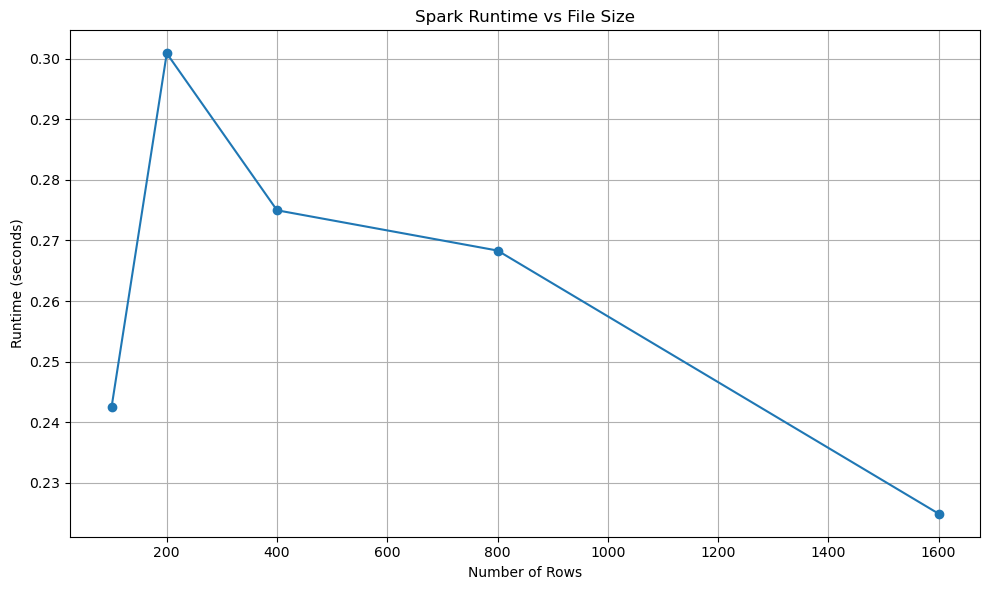

In [10]:
import csv
import os
import time
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
import matplotlib.pyplot as plt


spark = SparkSession.builder.appName("SparkSQLApp").getOrCreate()

def find_average(file):
    path = f"gs://dataproc-staging-us-central1-359639680738-vfiiktvj/data/{file}"
    
    df = (spark.read.format("csv")
    .option("inferSchema", "true")
    .option("header", "true")
    .load(path))
    
    start = time.time()
    df.groupBy("day").agg(avg("degree")).show()
    end = time.time()
    
    print("Time for " + file + ": " + str(end - start))
    return (end - start)

times = []
for file in ["data100.csv", "data200.csv", "data400.csv", "data800.csv", "data1600.csv"]:
    runtime = find_average(file)
    times.append(runtime)


sizes = [100, 200, 400, 800, 1600]

plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o')
plt.title("Spark Runtime vs File Size")
plt.xlabel("Number of Rows")
plt.ylabel("Runtime (seconds)")
plt.grid(True)
plt.tight_layout()
plt.show()